In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from datetime import date, timedelta
from sqlalchemy import create_engine

with open('config/credentials.json') as f:
    credentials = json.load(f)

# create connection string
connection_string = f"postgresql://{credentials['username']}:{credentials['password']}@{credentials['host']}:{credentials['port']}/{credentials['database_name']}"

# create the engine with the connection string
engine = create_engine(connection_string)



In [18]:
sql = """SELECT reservation_no, start_station_no, vehicle_no, reservationfrom_time_discrete, drive_firststart_time_discrete, 
            drive_lastend_time_discrete, reservation_duration, revenue_distance, required_soc, revenue_duration, drive_km, 
            (floor(EXTRACT(epoch FROM (date_trunc('hour', TO_TIMESTAMP(drive_lastend, 'YYYY-MM-DD HH24:MI:SS.MS')) + 
                                floor(EXTRACT(minute FROM TO_TIMESTAMP(drive_lastend, 'YYYY-MM-DD HH24:MI:SS.MS')) / 15) * interval '15 minutes' 
                                - date_trunc('hour', TO_TIMESTAMP(drive_firststart, 'YYYY-MM-DD HH24:MI:SS.MS')) - 
                                floor(EXTRACT(minute FROM TO_TIMESTAMP(drive_firststart, 'YYYY-MM-DD HH24:MI:SS.MS')) / 15) * interval '15 minutes'
                               )) / 900) * 900 + 900) / 900 AS drive_duration
            FROM msc_2023_dominik.reservations_long_time 
            WHERE  DATE(reservationfrom_discrete_date) = '{}' or  DATE(drive_firststart_discrete_date) = '{}' 
            ORDER BY vehicle_no
            """.format(date(2019, 1, 8), date(2019, 1, 8))
reservations = pd.read_sql(sql, engine)

In [20]:
len(reservations)

3388

In [2]:
progress_A2C = pd.read_csv("progress.csv")

In [3]:
progress_A2C.columns

Index(['train/learning_rate', 'time/time_elapsed', 'train/policy_loss',
       'train/entropy_loss', 'rollout/ep_len_mean', 'time/total_timesteps',
       'train/value_loss', 'train/explained_variance', 'rollout/ep_rew_mean',
       'train/n_updates', 'time/iterations', 'time/fps'],
      dtype='object')

In [4]:
nr_episodes = progress_A2C['train/n_updates'].values*10/95

In [5]:
mean_reward = progress_A2C['rollout/ep_rew_mean'].values

In [14]:
value_loss = progress_A2C['train/value_loss'].values

In [17]:
policy_loss = progress_A2C['train/policy_loss'].values

In [19]:
entropy_loss = progress_A2C['train/entropy_loss'].values

In [21]:
explained_variance = progress_A2C['train/explained_variance'].values

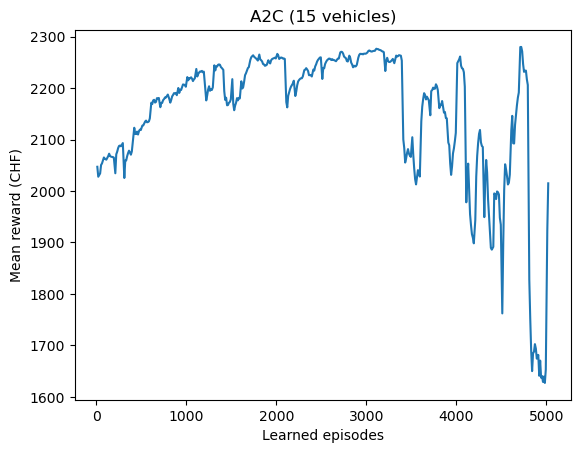

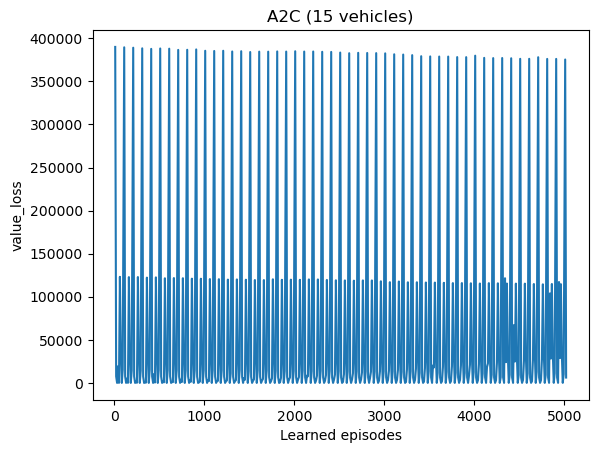

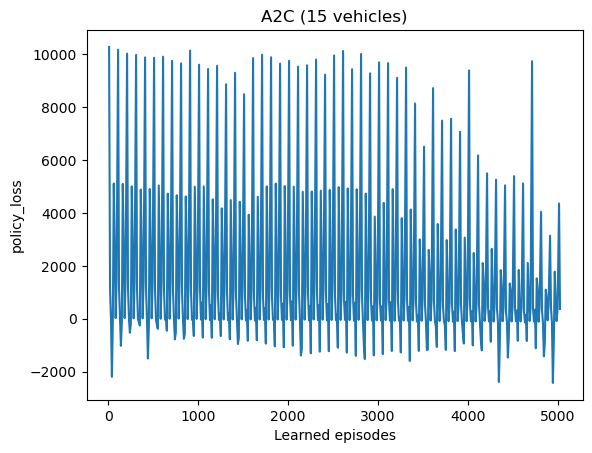

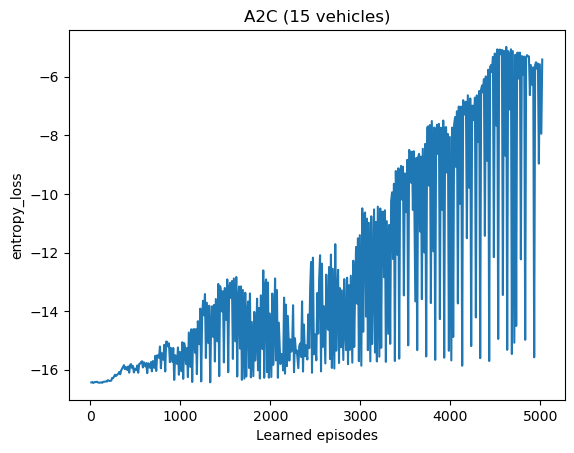

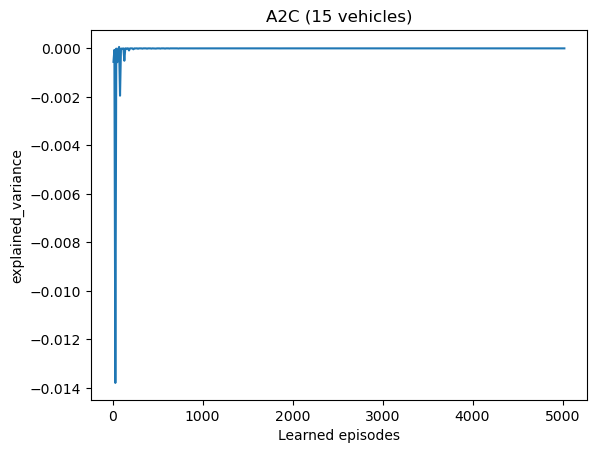

In [23]:
plt.plot(nr_episodes,mean_reward)
plt.title("A2C (15 vehicles)")
plt.ylabel('Mean reward (CHF)')
plt.xlabel('Learned episodes')
plt.show()

plt.plot(nr_episodes,value_loss)
plt.title("A2C (15 vehicles)")
plt.ylabel('value_loss')
plt.xlabel('Learned episodes')
plt.show()

plt.plot(nr_episodes,policy_loss)
plt.title("A2C (15 vehicles)")
plt.ylabel('policy_loss')
plt.xlabel('Learned episodes')
plt.show()

plt.plot(nr_episodes,entropy_loss)
plt.title("A2C (15 vehicles)")
plt.ylabel('entropy_loss')
plt.xlabel('Learned episodes')
plt.show()

plt.plot(nr_episodes,explained_variance)
plt.title("A2C (15 vehicles)")
plt.ylabel('explained_variance')
plt.xlabel('Learned episodes')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabel'

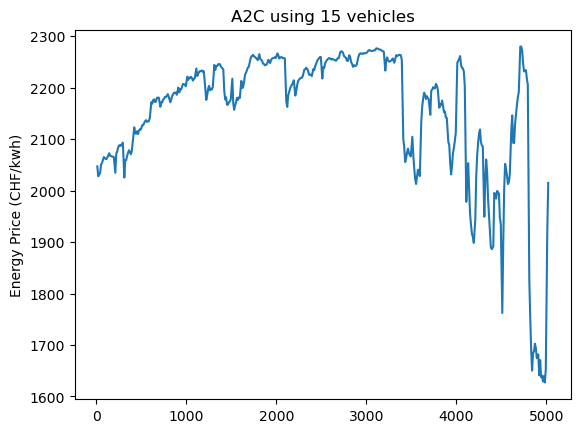

In [43]:
plt.plot(nr_episodes,mean_reward)
plt.title("A2C using 15 vehicles")
plt.ylabel('Energy Price (CHF/kwh)')
plt.xlabel('Energy Price (CHF/kwh)')


In [12]:
np.load("reward_list_model_small.npy")

array([11620.40961541, 11121.55385177, 11720.9855196 , 11619.06076484,
       11319.9773075 , 11420.7883173 ])

In [11]:
np.load("count_list_model_small.npy")

array([  0,   5, 105, 205, 305, 405])

In [6]:
len(reward)

957

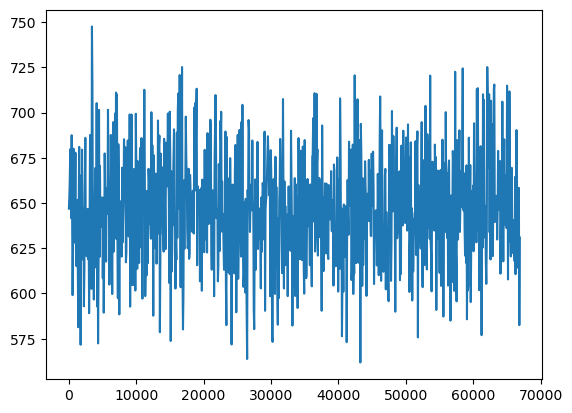

In [5]:
reward = np.load("reward_list_v1.npy")
count = np.load("count_list_v2.npy")

plt.plot(count, reward)

In [ ]:
count = np.load("count_list_v1.npy")

In [11]:
# Reshape the array into a shape of (10, 10) to group 100 values into 10 groups of 10
reshaped_arr = reward[:900].reshape((9, 100))

# Calculate the average along axis 1 (row-wise average)
average_arr = np.mean(reshaped_arr, axis=1)

In [12]:
average_arr

array([643.47946183, 649.93422253, 651.33202014, 643.6850959 ,
       640.76893096, 643.02549737, 645.43585904, 649.70096083,
       650.55511919])

In [8]:
a = 1

In [10]:
for i in range(0,10):
    c = 2
print(c)

2


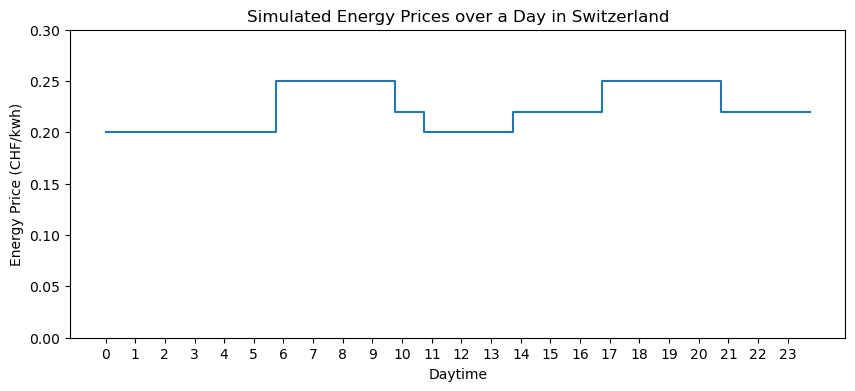

In [2]:

plt.subplots(figsize=(10, 4))

# model energy prices over day
energy_prices = np.zeros(96)
energy_prices[:24] = 0.2
energy_prices[24:40] = 0.25
energy_prices[40:44] = 0.22
energy_prices[44:56] = 0.2
energy_prices[56:68] = 0.22
energy_prices[68:84] = 0.25
energy_prices[84:] = 0.22

time_values = np.arange(0, 24, 0.25)

plt.step(time_values, energy_prices)
plt.xlabel('Daytime')
plt.ylabel('Energy Price (CHF/kwh)')
plt.ylim(0, 0.3)
plt.title('Simulated Energy Prices over a Day in Switzerland')
plt.xticks(np.arange(0, 24, 1))
plt.show()

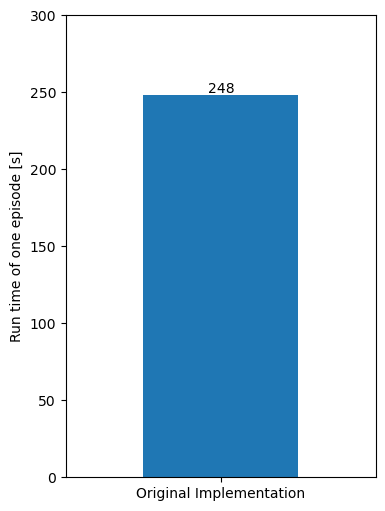

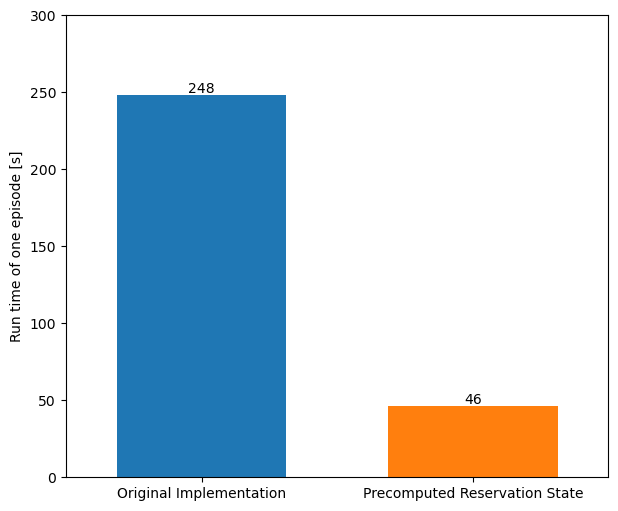

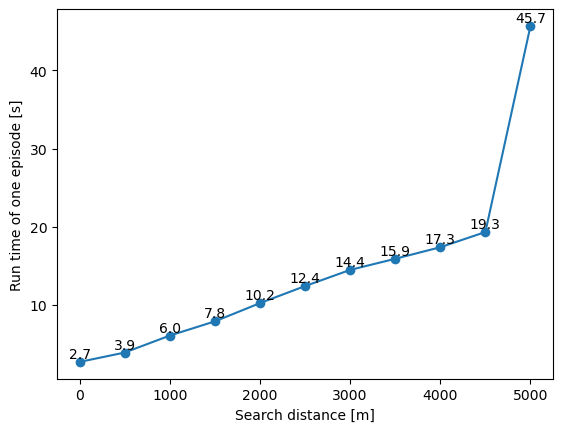

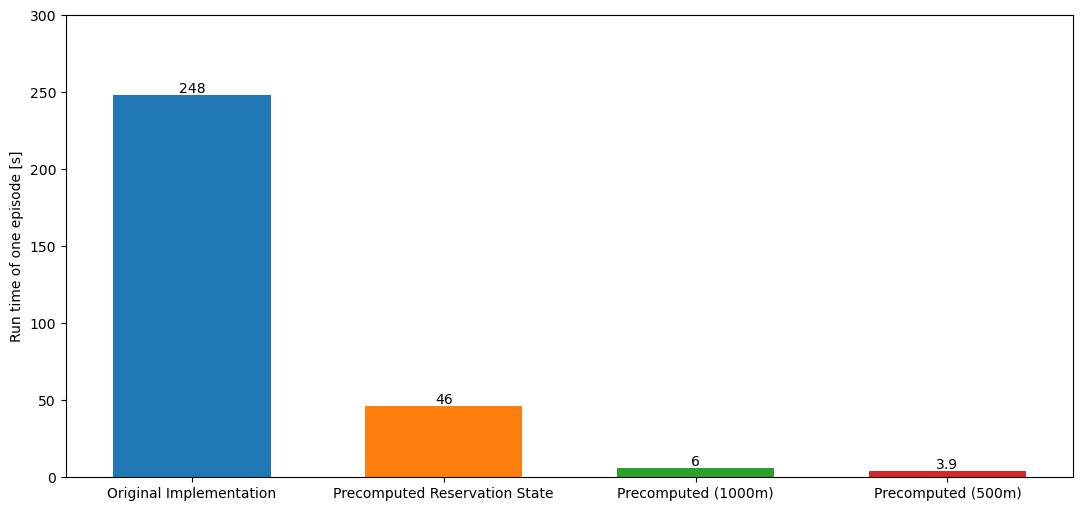

In [3]:
values = [247.77738285064697,45.70861530303955,19.298124313354492,17.34853219985962,15.867969989776611,14.441028118133545,12.368685007095337,10.183937549591064,7.847553968429565,6.0264105796813965,3.8512191772460938,2.651200771331787]

labels = ["original",5000,4500,4000,3500,3000,2500,2000,1500,1000,500,0]

# Set the height and width of the figure
fig, ax = plt.subplots(figsize=(4, 6))

# Create a single bar plot
ax.bar(0, 248, width=0.5)
ax.text(0, 248+1.5, str(248), ha='center')

# Set the x-axis and y-axis limits
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0, 300)

# Set the x-axis tick labels
ax.set_xticks([0])
ax.set_xticklabels(['Original Implementation'])
ax.set_ylabel('Run time of one episode [s]')

# Show the plot
plt.show()

# Set the height and width of the figure
fig, ax = plt.subplots(figsize=(7, 6))

# Create two single value bar plots with margin
ax.bar(0.4, 248, width=0.5)
ax.bar(1.2, 46, width=0.5)
ax.text(0.4, 248+1.5, str(248), ha='center')
ax.text(1.2,46+1.5, str(46), ha='center')

# Set the x-axis and y-axis limits
ax.set_xlim(-0, 1.6)
ax.set_ylim(0, 300)
ax.set_ylabel('Run time of one episode [s]')

# Set the x-axis tick labels
ax.set_xticks([0.4, 1.2])
ax.set_xticklabels(['Original Implementation', 'Precomputed Reservation State'])

# Show the plot
plt.show()

x = [5000, 4500, 4000, 3500, 3000, 2500, 2000, 1500, 1000, 500, 0]
y = [45.70861530303955, 19.298124313354492, 17.34853219985962, 15.867969989776611, 14.441028118133545, 12.368685007095337, 10.183937549591064, 7.847553968429565, 6.0264105796813965, 3.8512191772460938, 2.651200771331787]

# Round each y-value to one decimal place
y_rounded = [round(val, 1) for val in y]

plt.plot(x, y, '-o')
for i, val in enumerate(y_rounded):
    plt.text(x[i], y[i]+0.5, str(val), ha='center')
plt.xlabel('Search distance [m]')
plt.ylabel('Run time of one episode [s]')
#plt.title('Run time dependent on search distance of car assingment problem')
plt.show()

# Set the height and width of the figure
fig, ax = plt.subplots(figsize=(13, 6))

# Create two single value bar plots with margin
ax.bar(0.4, 248, width=0.5)
ax.bar(1.2, 46, width=0.5)
ax.bar(2, 6, width=0.5)
ax.bar(2.8, 3.9, width=0.5)
ax.text(0.4, 248+1.5, str(248), ha='center')
ax.text(1.2,46+1.5, str(46), ha='center')
ax.text(2,6+1.5, str(6), ha='center')
ax.text(2.8,3.9+1.5, str(3.9), ha='center')

# Set the x-axis and y-axis limits
ax.set_xlim(-0, 3.2)
ax.set_ylim(0, 300)
ax.set_ylabel('Run time of one episode [s]')

# Set the x-axis tick labels
ax.set_xticks([0.4, 1.2, 2, 2.8])
ax.set_xticklabels(['Original Implementation', 'Precomputed Reservation State','Precomputed (1000m)','Precomputed (500m)'])

# Show the plot
plt.show()